In [190]:
import time
import numpy as np
import pandas as pd
from scipy.special import softmax
import matplotlib.pyplot as plt

In [159]:
## Initialize random data (A matrix)
m = 1000 # number of examples
d = 1000 # dim of example
k = 50 # number of output classes
# Data init
A = np.random.normal(0,1,size=(m,d)) # (# examples, dim examples)
# Param init
X = np.random.normal(0,1,size=(d,k)) # (dim examples, # classes)
E = np.random.normal(0,1,size=(m,k)) 
# Generate target classes
#b_i = np.random.randint(1, k+1, size=(m,1))
#b_i_zeroidx = b_i - 1
I_k = np.eye(k)

# This is a kinda strange way of generating data
b = np.dot(A,X) + E # (m,k)
b_i = b.argmax(axis=1) # zero indexed!
b_onehot = I_k[b_i]

In [ ]:
def toy_data():
    ## Initialize random data (A matrix)
    m = 1000 # number of examples
    d = 1000 # dim of example
    k = 50 # number of output classes
    # Data init
    A = np.random.normal(0,1,size=(m,d)) # (# examples, dim examples)
    # Param init
    X = np.random.normal(0,1,size=(d,k)) # (dim examples, # classes)
    E = np.random.normal(0,1,size=(m,k)) 
    # Generate target classes
    #b_i = np.random.randint(1, k+1, size=(m,1))
    #b_i_zeroidx = b_i - 1
    I_k = np.eye(k)

    # This is a kinda strange way of generating data
    b = np.dot(A,X) + E # (m,k)
    b_i = b.argmax(axis=1) # zero indexed!
    b_onehot = I_k[b_i]
    

In [49]:
# for sanity
num_examples = m
example_dim = d
num_classes = k


In [5]:
b.argmax(axis=1)

array([30, 23, 17,  9,  0, 32, 26, 29, 31,  3, 36, 21, 11,  6, 29, 13, 36,
       29, 34, 33, 46, 37, 35, 34, 39, 24, 37, 28, 44, 19,  9, 43,  7, 14,
       16, 34, 28, 45, 35, 24,  6, 23, 25, 36, 22, 33, 35, 30,  4, 31, 34,
       24,  7, 36, 14,  1, 10,  2, 19,  5,  9, 22,  1, 10, 39, 12, 34, 47,
       33, 42, 12,  6, 31, 30, 26, 17, 16,  1, 27,  2, 24, 30,  7, 30, 14,
        4, 27,  2,  8, 15, 31, 14, 18, 15, 47, 48, 23, 28, 22, 26, 24, 19,
       12, 34, 49, 35, 11, 30, 46,  1, 21, 17, 22, 10, 22, 33, 12,  1, 39,
        3, 11, 44,  2,  5,  9,  7, 25, 10, 37, 38,  0, 32, 19,  2, 15, 29,
       10, 34, 33, 28, 38, 15, 32, 46, 36, 26, 27, 48, 17, 43, 39, 41, 20,
       11,  8,  8, 44, 39, 36, 45, 45, 45, 22, 39, 18,  6, 24, 45, 35, 48,
       34, 27, 20, 10,  6, 39,  0, 41, 45,  8,  1, 26, 18,  8,  7, 37, 49,
       42, 24,  9, 16,  4, 20, 19, 34, 40, 14, 33,  8, 22, 15, 27, 26, 17,
       13, 24, 37, 16, 15, 14, 14, 30, 28, 32, 49, 43,  0,  1, 11, 39, 19,
       31, 43, 28, 18, 14

In [10]:

def grad(A, Y, X):
    Z = - A @ X
    probs = softmax(Z, axis=1)
    m = A.shape[0]
    grad_X = 1/m * (A.T @ (Y - probs))
    return grad_X
def loss(A, Y, X):
    Z = - A @ X
    N = A.shape[0]
    loss = 1/N * (np.trace(A @ X @ Y.T) + np.sum(np.log(np.sum(np.exp(Z), axis=1))))
    return loss

In [11]:

#from sklearn.preprocessing import OneHotEncoder
#onehot_encoder = OneHotEncoder(sparse=False)
def gd(A, b_onehot, max_iter=1000, eta=0.1, X_0 = None):
    m,d = A.shape
    k = b_onehot.shape[1]
    X = np.zeros((d, k)) if X_0 is None else X_0
    loss_hist = []
 
    for i in range(max_iter):
        X -= eta * grad(A, b_onehot, X)
        loss_hist.append(loss(A, b_onehot, X))

    df = pd.DataFrame({'loss': loss_hist})
    return df, X

In [12]:
df, W = gd(A,b_onehot)

In [13]:
df

,loss
0,3.803656
1,3.696235
2,3.589806
3,3.484421
4,3.380134
...,...
995,0.012418
996,0.012405
997,0.012392
998,0.012379


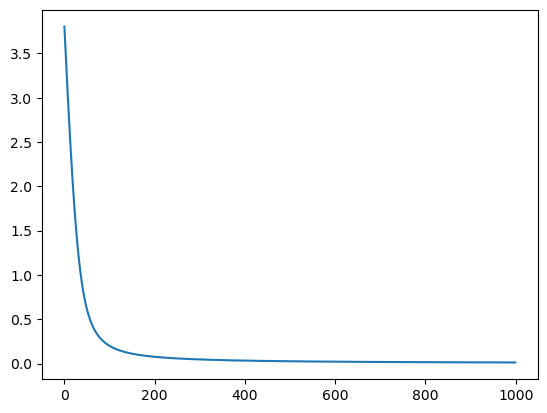

In [15]:
plt.plot(df['loss'])

Sources:

# BCGD

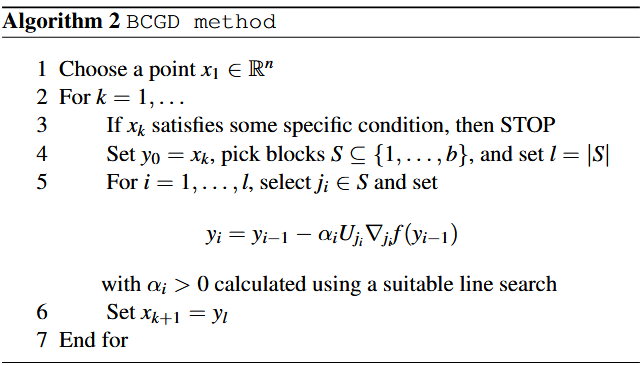

In [19]:
A[1,:].reshape((1,d))

array([[-6.48057627e-02,  1.20126420e-01,  1.01376660e+00,
         1.32489927e-01,  2.39746487e-01, -2.14868582e-01,
        -1.74589723e-01, -9.57044699e-02,  4.43901051e-01,
        -1.01659226e+00, -1.76323333e+00, -1.37740428e-01,
        -6.08659754e-01,  1.38326313e+00, -4.38345057e-01,
        -1.27839263e+00,  5.94926886e-01,  1.26795009e+00,
         3.25209611e-01,  1.05470929e+00,  1.97031071e+00,
        -3.93688870e-01, -5.83038199e-01, -2.90920379e-01,
         4.33776094e-01,  3.92554798e-01, -2.12040118e+00,
        -2.25402176e+00, -1.36415834e-01,  3.54596445e-02,
         1.44544587e+00,  1.05630285e+00, -4.06300719e-01,
         1.50587303e+00,  1.56434855e+00, -6.23078539e-01,
         1.26351203e+00, -7.44370031e-01, -4.71576769e-01,
        -2.03483399e-01,  9.32766873e-01,  6.23765968e-01,
        -4.71843449e-01, -1.01034167e+00, -1.07522795e+00,
        -1.72177676e+00, -1.33767162e+00, -4.70025120e-01,
         3.98766278e-01, -1.20068599e+00,  9.91934853e-0

In [20]:
b_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [29]:
np.linalg.norm(np.array([[1,2,3],[2,0,0]]),2, axis = 0)

array([2.23606798, 2.        , 3.        ])

In [216]:
#TODO: calculate lipshitz constant.
L = 0.01
alpha = 1/L

In [242]:
# TODO: implement a faster version that calculates just the ith component
def gs_coord_select(X):
    """"
    Step 4 in the BCGD with GS rule.
    Picks block with maximial gradient
    we select a COORDINATE meaning we get the col of the gradient with biggest magnitude
    Using the full gradeint is more expensive that calculating just a component.
    But is needed here since we need to choose the block of max change
    """
    g = grad(A, b_onehot, X)
    i_k = np.argmax(np.linalg.norm(g, 2, axis = 0)) # select the coord (col)
    g_ik = g[:,i_k].reshape((m,1))
    return g_ik, i_k

def coord_step(X0, i_k, g_ik):
    step = - alpha * g_ik
    
    X_out = X0
    X_out[:,i_k] += step.flatten()
    return X_out


# TODO: check optimality condition for early stopping.
def BCGD(coord_select, max_iter = 100, return_hist = True):
    X_cur = np.copy(X)
    hist = []
    start_time_p = time.process_time()
    start_time_w = time.time()
    for iter in range(max_iter):
        hist_iter = {'iter': iter}
        g_ik, i_k = coord_select(X_cur)
        X_cur = coord_step(X_cur, i_k, g_ik)
        if return_hist:
            Z = - A @ X_cur
            predictions = softmax(Z)
            predicted_labels = np.argmax(predictions, axis=1)
            actual_labels = np.argmax(b_onehot, axis=1)
            accuracy = np.mean(predicted_labels == actual_labels)
            hist_iter = {
                'iter': iter,
                'loss': loss(A, b_onehot, X_cur),
                'accuracy': accuracy,
                'i_k': i_k,
                'L2_g_ik': np.linalg.norm(g_ik,2),
                'cpu_time': time.process_time() - start_time_p, # parallization will make this longer than exec time!
                'wall_time': time.time() - start_time_w
                }
            hist.append(hist_iter)
    if return_hist:
        return pd.DataFrame(hist)
    else:
        return

def rand_coord_select(X):
    # TODO: CALCULATING THE FULL GRAD HERE IS NOT NECESSARY
    # [IMPORTANT] it will run faster if this is optimized.
    g = grad(A, b_onehot, X) 
    i_k = np.random.randint(k) # select the coord (col)
    g_ik = g[:,i_k].reshape((m,1))
    return g_ik, i_k

In [246]:
hist_BCGD_GS_df = BCGD(gs_coord_select, max_iter=200)
hist_BCGD_GS_df

,iter,loss,accuracy,i_k,L2_g_ik,cpu_time,wall_time
0,0,138.651715,0.014,0,0.273364,0.093750,0.036522
1,1,135.342431,0.025,22,0.261842,0.234375,0.068689
2,2,132.655114,0.026,23,0.247383,0.375000,0.098702
3,3,129.597146,0.031,32,0.249188,0.562500,0.130337
4,4,126.188375,0.040,5,0.247906,0.718750,0.157338
...,...,...,...,...,...,...,...
195,195,0.000038,1.000,28,0.000057,17.203125,3.377948
196,196,0.000038,1.000,6,0.000056,17.296875,3.391965
197,197,0.000038,1.000,4,0.000055,17.343750,3.405929
198,198,0.000038,1.000,24,0.000055,17.453125,3.421882


In [244]:
hist_BCGD_rand_df = BCGD(rand_coord_select, max_iter=500)
hist_BCGD_rand_df

,iter,loss,accuracy,i_k,L2_g_ik,cpu_time,wall_time
0,0,140.480258,0.000,38,0.194109,0.156250,0.030150
1,1,137.983573,0.003,9,0.213081,0.312500,0.055059
2,2,135.368247,0.006,6,0.217394,0.484375,0.093759
3,3,132.554342,0.013,27,0.230231,0.671875,0.115346
4,4,129.829866,0.024,15,0.253566,0.812500,0.146894
...,...,...,...,...,...,...,...
495,495,0.000041,1.000,7,0.000061,38.984375,8.419500
496,496,0.000041,1.000,36,0.000025,39.093750,8.435031
497,497,0.000041,1.000,24,0.000020,39.156250,8.451034
498,498,0.000041,1.000,24,0.000019,39.281250,8.468362


In [260]:
hist_BCGD_GS_df[gs_sele]['wall_time']

0      0.036522
1      0.068689
2      0.098702
3      0.130337
4      0.157338
         ...   
129    2.385496
130    2.399954
131    2.415523
132    2.429522
133    2.444524
Name: wall_time, Length: 134, dtype: float64

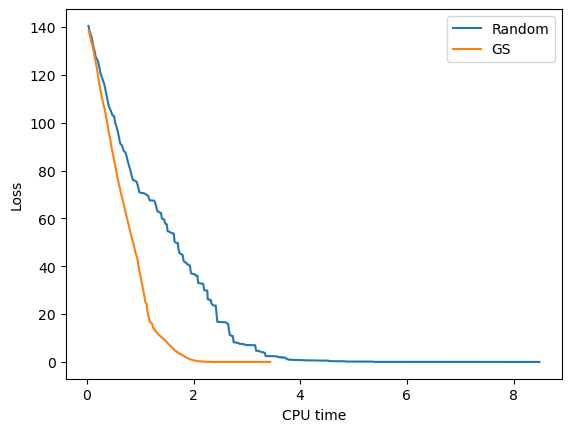

In [262]:
fig = plt.figure()
rand_sele = (hist_BCGD_rand_df['L2_g_ik'] > 0.01)
gs_sele = (hist_BCGD_GS_df['L2_g_ik'] > 0.01)
plt.plot(hist_BCGD_rand_df['wall_time'], hist_BCGD_rand_df['loss'], label = 'Random')
plt.plot(hist_BCGD_GS_df['wall_time'], hist_BCGD_GS_df['loss'], label='GS')
plt.legend()
plt.xlabel('CPU time')
plt.ylabel('Loss')
plt.show()

<Axes: >

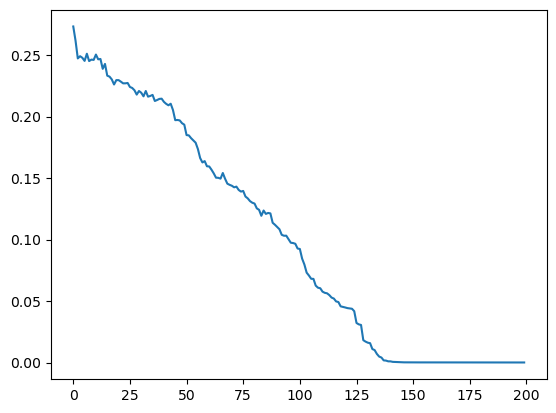

In [263]:
hist_BCGD_GS_df['L2_g_ik']

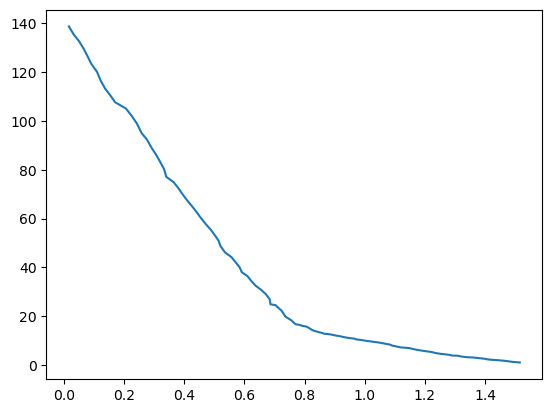

In [225]:
plt.plot(hist_BCGD_GS_df['wall_time'], hist_BCGD_GS_df['loss'])

<Axes: >

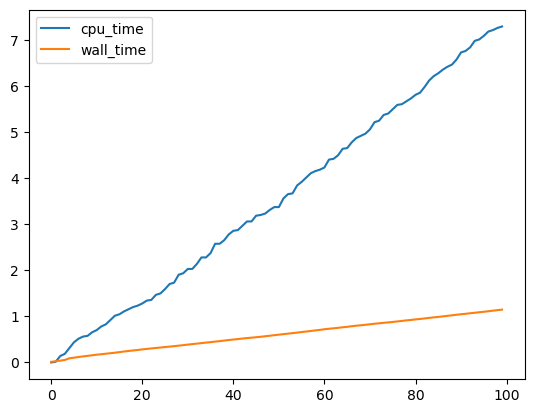

In [207]:
hist_BCGD_GS_df[['cpu_time', 'wall_time']].plot()